In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from graphufs.spatialmap import SpatialMap 
import cartopy.crs as ccrs
import colormaps as cm
import pandas as pd

In [2]:
# output metadata
_scratch = "/pscratch/sd/n/nagarwal/"
_prototype = "atm-only"
_expt = "R0"
_prototype_home = "/global/homes/n/nagarwal/graph-ufs/prototypes/"
_inference_dir = os.path.join(_scratch, _prototype, _expt,
                              "inference", "validation")
_figdir = os.path.join(_prototype_home, _prototype, _expt, "figures")

In [3]:
# GraphUFS predictions
fname = "graphufs.240h.zarr"
ds_pred = xr.open_zarr(os.path.join(_inference_dir, fname))
ds_pred

<xarray.Dataset> Size: 1TB
Dimensions:    (time: 1024, lead_time: 40, level: 16, lat: 192, lon: 384)
Coordinates:
  * lat        (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lead_time  (lead_time) timedelta64[ns] 320B 0 days 06:00:00 ... 10 days 0...
  * level      (level) float64 128B 226.1 676.2 773.6 ... 825.8 922.6 572.7
  * lon        (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time       (time) datetime64[ns] 8kB 2022-01-01T03:00:00 ... 2023-10-02T1...
Data variables:
    dzdt       (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    pressfc    (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    spfh       (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    spfh2m     (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    tmp        (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    tmp2m      (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    ugrd       (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    ugrd10m    (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    vgrd       (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    vgrd10m    (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>

In [4]:
# Replay targets
fname = "replay.240h.zarr"
ds_tar = xr.open_zarr(os.path.join(_inference_dir, fname))
ds_tar

<xarray.Dataset> Size: 1TB
Dimensions:    (time: 1024, lead_time: 40, level: 16, lat: 192, lon: 384)
Coordinates:
  * lat        (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lead_time  (lead_time) timedelta64[ns] 320B 0 days 06:00:00 ... 10 days 0...
  * level      (level) float64 128B 226.1 676.2 773.6 ... 825.8 922.6 572.7
  * lon        (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time       (time) datetime64[ns] 8kB 2022-01-01T03:00:00 ... 2023-10-02T1...
Data variables:
    dzdt       (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    pressfc    (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    spfh       (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    spfh2m     (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    tmp        (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    tmp2m      (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    ugrd       (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    ugrd10m    (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    vgrd       (time, lead_time, level, lat, lon) float32 193GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    vgrd10m    (time, lead_time, lat, lon) float32 12GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>

In [5]:
# Open the existing ocean zarr-store
ocn = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.zarr",
    storage_options={"token": "anon"},
)
ocn

<xarray.Dataset> Size: 5TB
Dimensions:       (time: 43826, lat: 192, lon: 384, zl: 75, z_l: 75)
Coordinates:
    cftime        (time) object 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
    ftime         (time) timedelta64[ns] 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
  * lat           (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lon           (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time          (time) datetime64[ns] 351kB 1993-12-31T18:00:00 ... 2023-12-31
  * z_l           (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
  * zl            (zl) float64 600B 1.0 3.0 5.0 ... 3.591e+03 5.111e+03
Data variables: (12/20)
    Heat_PmE      (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LwLatSens     (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SSH           (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    evap          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...            ...
    so            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    taux          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    tauy          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    temp          (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    uo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    vo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [6]:
# Open the existing atm zarr-store
atm = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/03h-freq/zarr/fv3.zarr",
    storage_options={"token": "anon"},
)
atm

<xarray.Dataset> Size: 60TB
Dimensions:        (time: 87020, grid_yt: 192, grid_xt: 384, pfull: 127)
Coordinates:
    cftime         (time) object 696kB dask.array<chunksize=(21755,), meta=np.ndarray>
    ftime          (time) timedelta64[ns] 696kB dask.array<chunksize=(21755,), meta=np.ndarray>
  * grid_xt        (grid_xt) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
  * grid_yt        (grid_yt) float64 2kB 89.82 88.89 87.95 ... -88.18 -89.12
  * pfull          (pfull) float32 508B 0.01278 0.02033 0.03177 ... 996.2 998.8
  * time           (time) datetime64[ns] 696kB 1993-12-31T18:00:00 ... 2023-1...
Data variables: (12/183)
    acond          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    albdo_ave      (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnsf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnwf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvsf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvwf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...             ...
    xtts           (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xu             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xv             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xz             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xzts           (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    zc             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

## Surface Pressure

In [5]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 20
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
variable = "pressfc"

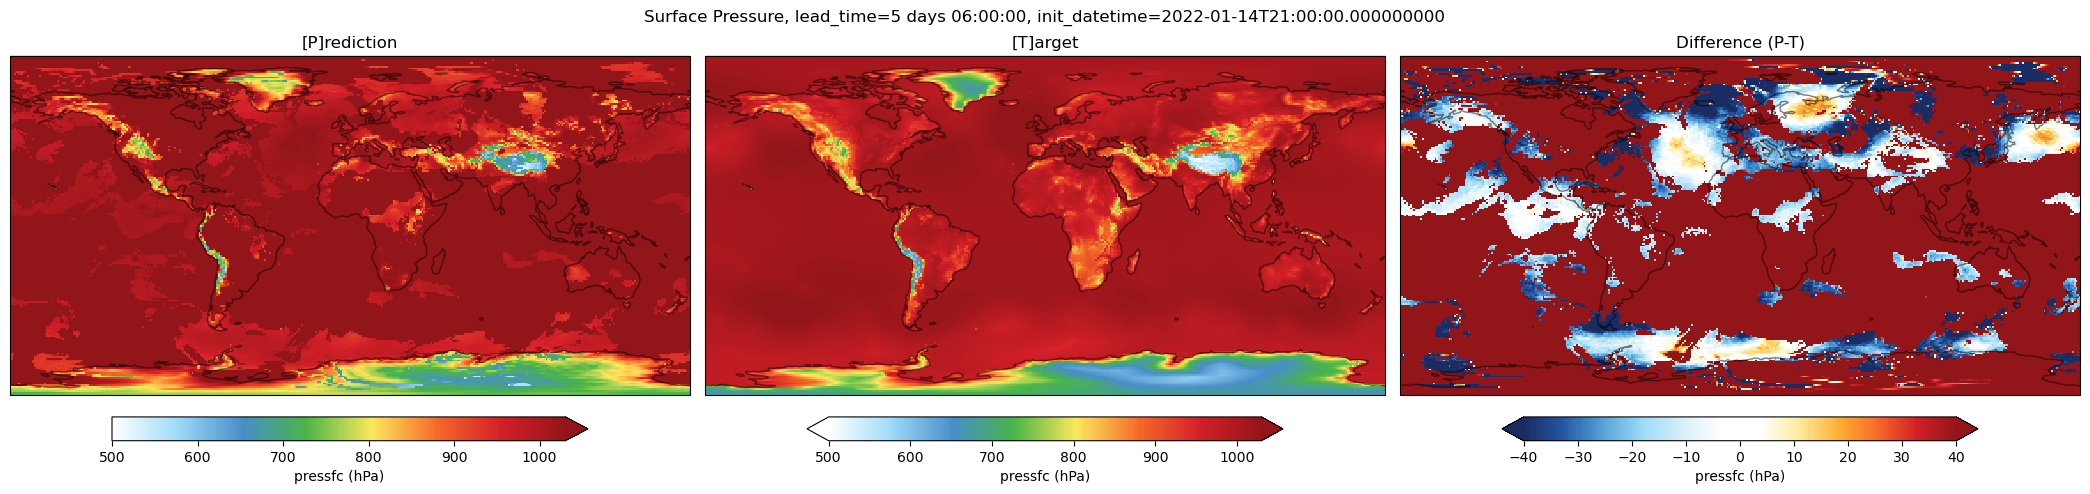

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(21,5), subplot_kw=dict(projection=ccrs.PlateCarree()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.7, "label":"pressfc (hPa)", "pad":0.05}, 
          "robust":True, "cmap":cm.WhiteBlueGreenYellowRed, "vmin":500, "vmax":1030,}

# prediction
prediction = ds_pred[variable].isel(time=itime, lead_time=ileadtime,)/100   # to hPa
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].coastlines(alpha=0.5)
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(time=itime, lead_time=ileadtime,)/100    # to hPa
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].coastlines(alpha=0.5)
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-40
kwargs["vmax"]=40
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].coastlines(alpha=0.5)
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"Surface Pressure, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
#plt.savefig(os.path.join(_figdir, f"{variable}_{_prototype}_{_expt}.png"), dpi=300)
plt.show()

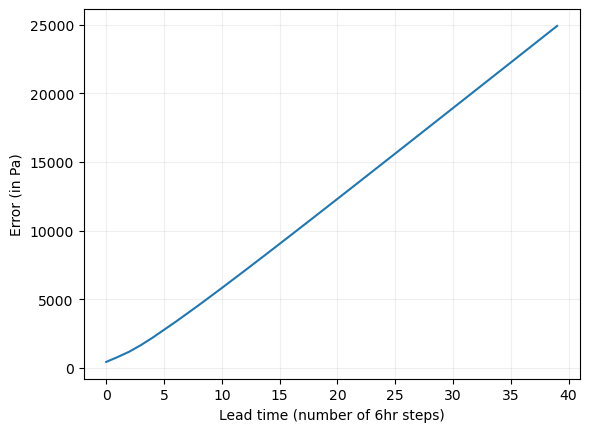

In [12]:
# RMSE Error
pressfc_sqerror = (ds_tar.pressfc - ds_pred.pressfc)**2
plt.plot(np.sqrt(pressfc_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in Pa)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

## 2m Temp

In [34]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 20
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
variable = "tmp2m"

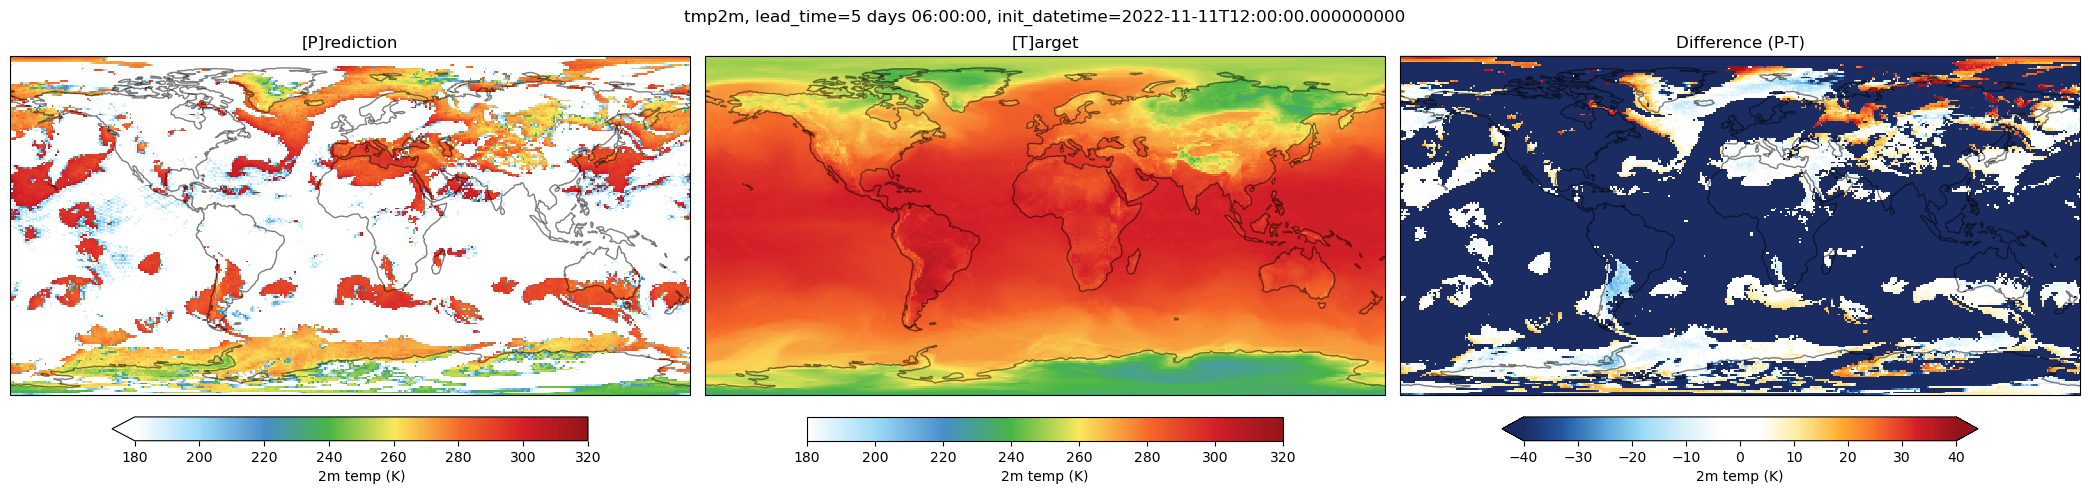

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(21,5), subplot_kw=dict(projection=ccrs.PlateCarree()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.7, "label":"2m temp (K)", "pad":0.05}, 
          "robust":True, "cmap":cm.WhiteBlueGreenYellowRed, "vmin":180, "vmax":320,}

# prediction
prediction = ds_pred[variable].isel(time=itime, lead_time=ileadtime,)
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].coastlines(alpha=0.5)
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(time=itime, lead_time=ileadtime,)
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].coastlines(alpha=0.5)
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-40
kwargs["vmax"]=40
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].coastlines(alpha=0.5)
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"{variable}, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
#plt.savefig(os.path.join(_figdir, f"{variable}_{_prototype}_{_expt}.png"), dpi=300)
plt.show()

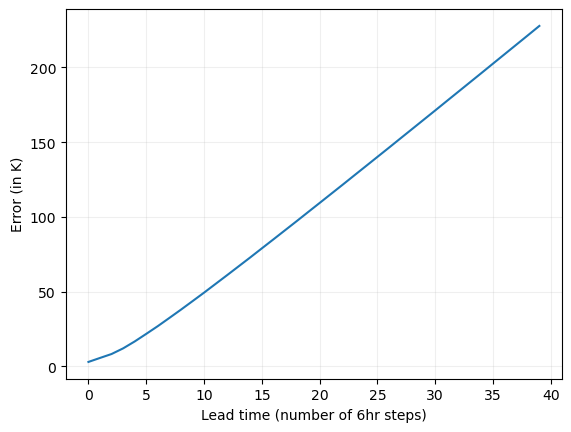

In [15]:
# RMSE Error
tmp2m_sqerror = (ds_tar.tmp2m - ds_pred.tmp2m)**2
plt.plot(np.sqrt(tmp2m_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in K)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

## 2m Specific Humidity

In [36]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 20
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
variable = "spfh2m"

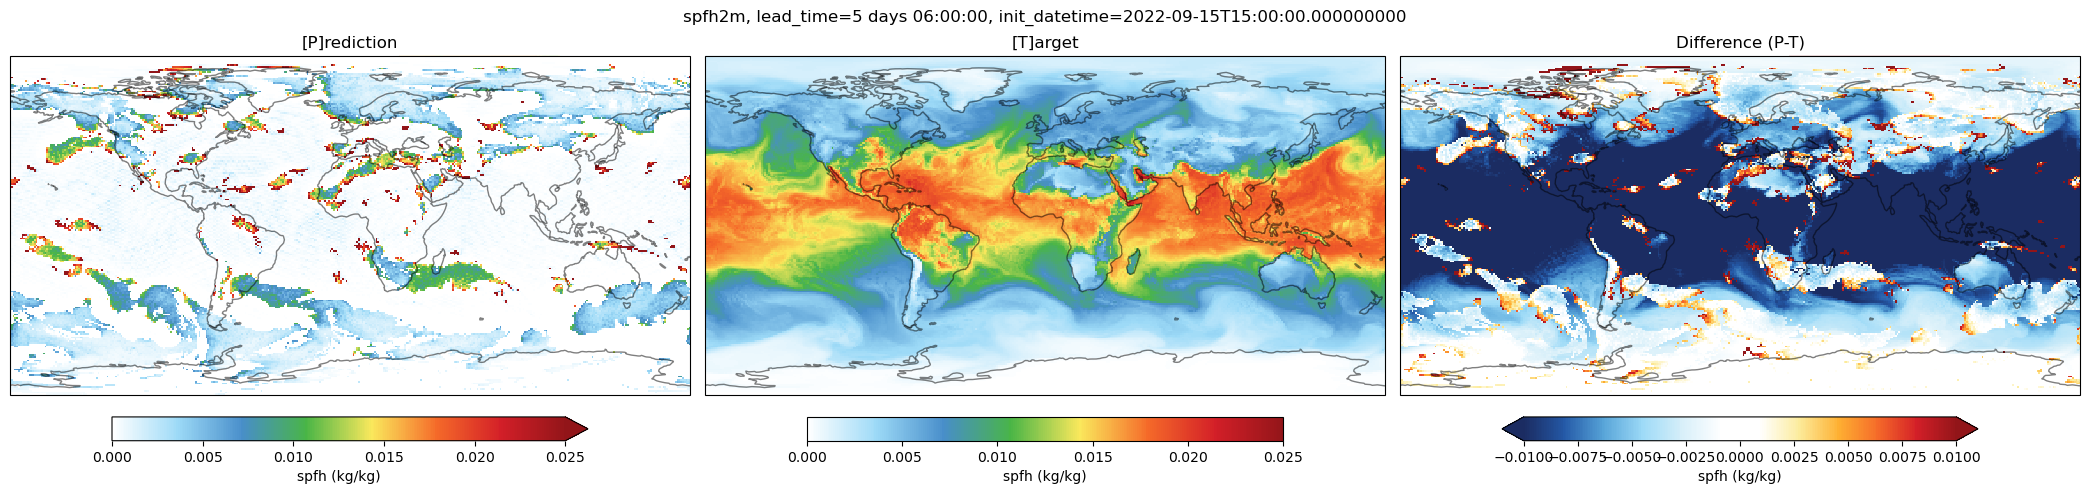

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(21,5), subplot_kw=dict(projection=ccrs.PlateCarree()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.7, "label":"spfh (kg/kg)", "pad":0.05}, 
          "robust":True, "cmap":cm.WhiteBlueGreenYellowRed, "vmin":0, "vmax":0.025,}

# prediction
prediction = ds_pred[variable].isel(time=itime, lead_time=ileadtime,)
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].coastlines(alpha=0.5)
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(time=itime, lead_time=ileadtime,)
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].coastlines(alpha=0.5)
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-0.01
kwargs["vmax"]=0.01
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].coastlines(alpha=0.5)
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"{variable}, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
#plt.savefig(os.path.join(_figdir, f"{variable}_{_prototype}_{_expt}.png"), dpi=300)
plt.show()

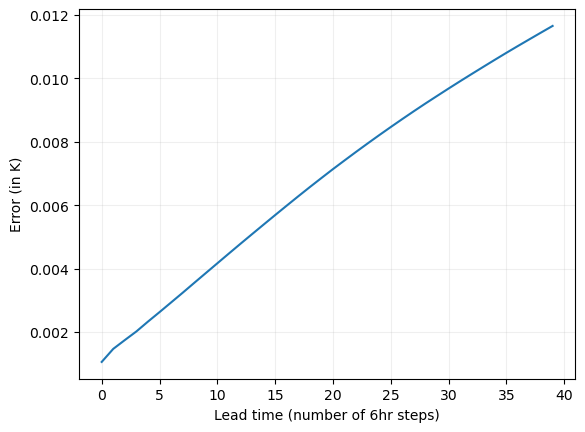

In [63]:
# RMSE Error
tmp2m_sqerror = (ds_tar.spfh2m - ds_pred.spfh2m)**2
plt.plot(np.sqrt(tmp2m_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in K)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

## 3D variables

### Temperature

In [29]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 2
ilevel = 5
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
variable = "tmp"

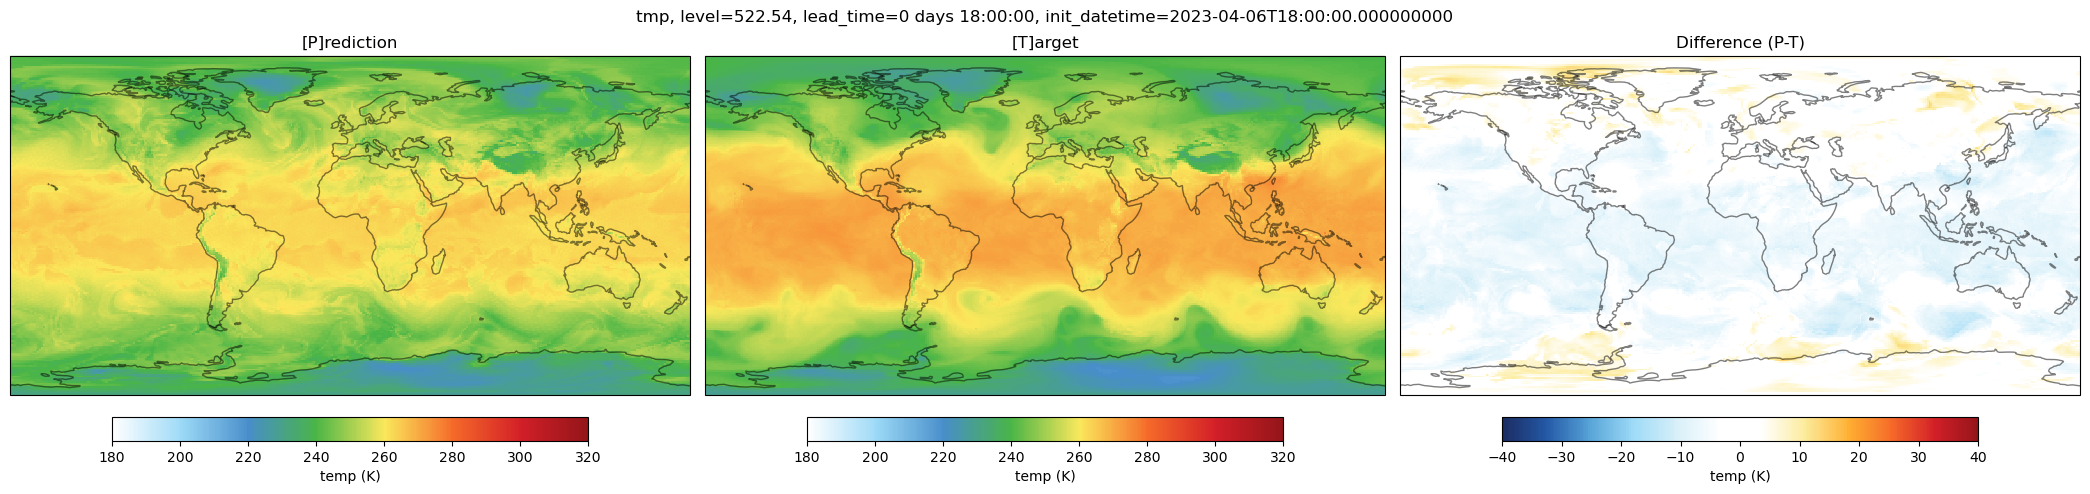

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(21,5), subplot_kw=dict(projection=ccrs.PlateCarree()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.7, "label":"temp (K)", "pad":0.05}, 
          "robust":True, "cmap":cm.WhiteBlueGreenYellowRed, "vmin":180, "vmax":320,}

# prediction
prediction = ds_pred[variable].isel(level=ilevel, time=itime, lead_time=ileadtime,)
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].coastlines(alpha=0.5)
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(level=ilevel, time=itime, lead_time=ileadtime,)
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].coastlines(alpha=0.5)
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-40
kwargs["vmax"]=40
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].coastlines(alpha=0.5)
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"{variable}, level={ds_pred.coords['level'][ilevel].values:.2f}, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
#plt.savefig(os.path.join(_figdir, f"{variable}_{_prototype}_{_expt}.png"), dpi=300)
plt.show()

### Specific Humidity

In [61]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 20
ilevel = 5
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
variable = "spfh"

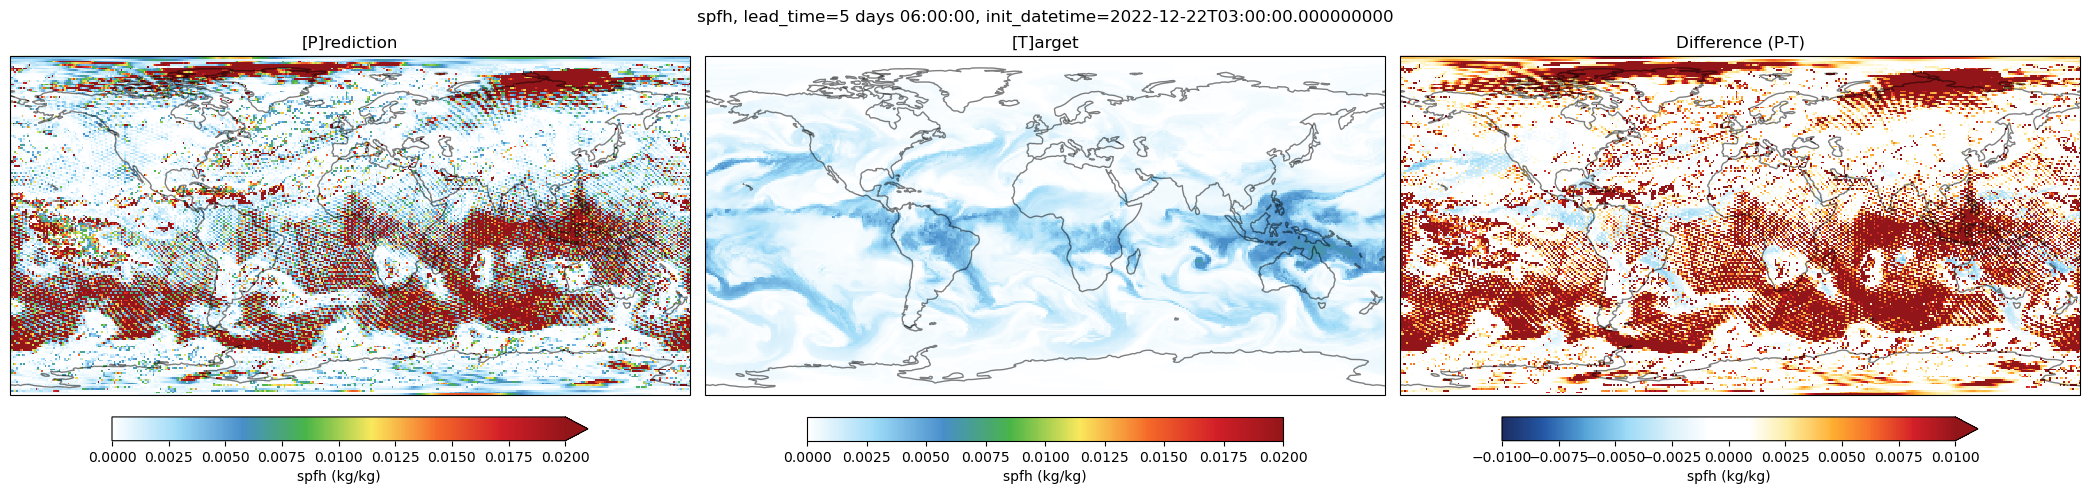

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(21,5), subplot_kw=dict(projection=ccrs.PlateCarree()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.7, "label":"spfh (kg/kg)", "pad":0.05}, 
          "robust":True, "cmap":cm.WhiteBlueGreenYellowRed, "vmin":0, "vmax":0.02,}

# prediction
prediction = ds_pred[variable].isel(level=ilevel, time=itime, lead_time=ileadtime,)
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].coastlines(alpha=0.5)
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(level=ilevel, time=itime, lead_time=ileadtime,)
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].coastlines(alpha=0.5)
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-0.01
kwargs["vmax"]=0.01
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].coastlines(alpha=0.5)
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"{variable}, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
#plt.savefig(os.path.join(_figdir, f"{variable}_{_prototype}_{_expt}.png"), dpi=300)
plt.show()

# Oceans

### SSH

In [104]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 7
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
variable = "SSH"

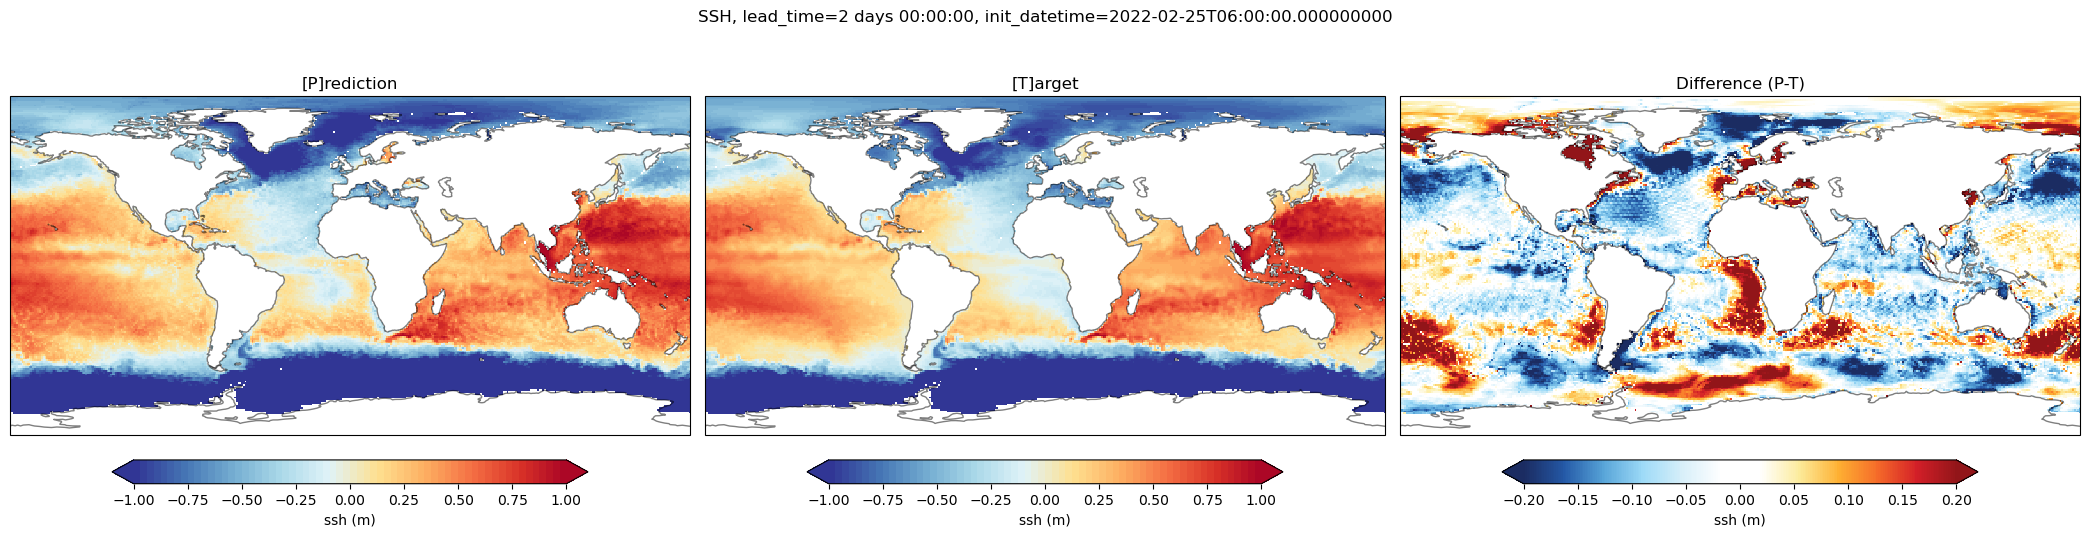

In [105]:
fig, axs = plt.subplots(1, 3, figsize=(21,5.5), subplot_kw=dict(projection=ccrs.PlateCarree()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.7, "label":"ssh (m)", "pad":0.05}, 
          "robust":True, "cmap":cm.cmp_b2r, "vmin":-1, "vmax":1,}

# prediction
ocean_mask = 1-ocn.landsea_mask.isel(z_l=0,)
prediction = ds_pred[variable].isel(time=itime, lead_time=ileadtime,).where(ocean_mask)
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].coastlines(alpha=0.5)
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(time=itime, lead_time=ileadtime,).where(ocean_mask)
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].coastlines(alpha=0.5)
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-0.2
kwargs["vmax"]=0.2
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].coastlines(alpha=0.5)
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"{variable}, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
plt.savefig(os.path.join(_figdir, f"{variable}_{_prototype}_{_expt}.png"), dpi=300)
plt.show()

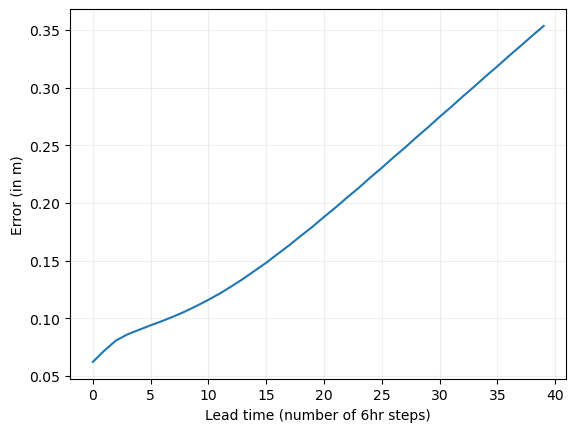

In [17]:
ssh_sqerror = (ds_tar.SSH - ds_pred.SSH*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(ssh_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in m)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

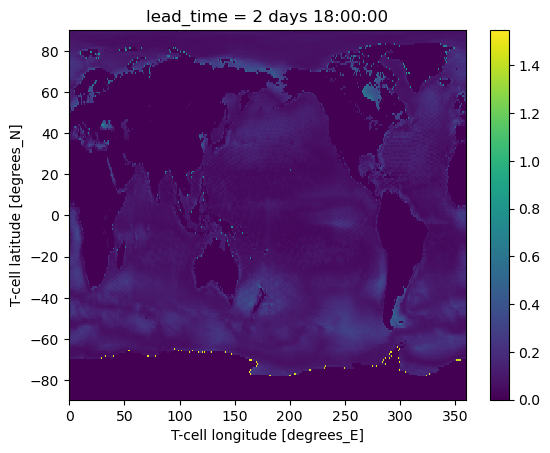

In [18]:
# Spatial RMSE
ileadtime = 10
ssh_rmse_latlon = np.sqrt(ssh_sqerror.mean(dim=('time')))
ssh_rmse_latlon.isel(lead_time=ileadtime).plot()
plt.show()

### Temp

In [119]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 7
iz_l = 0
variable = "temp"

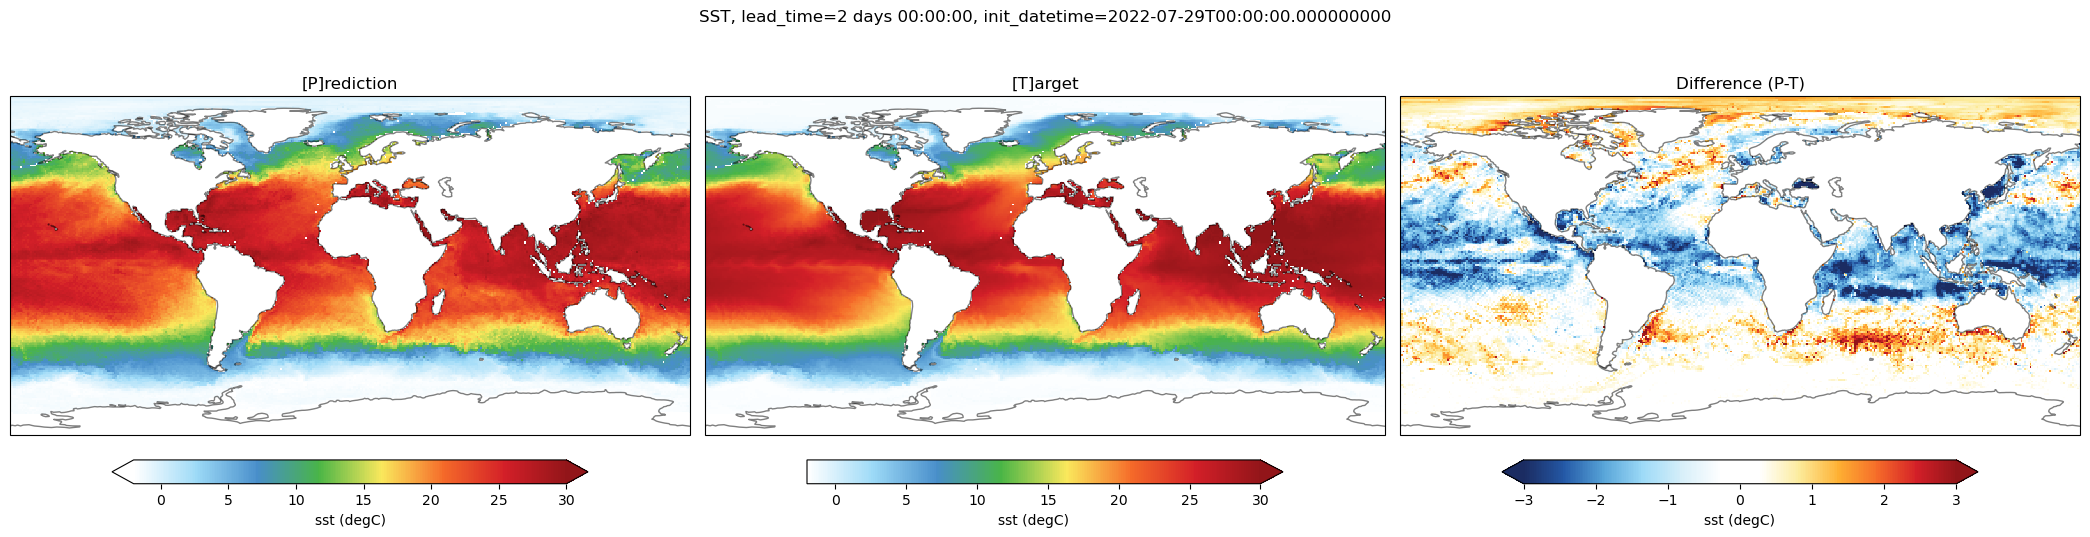

In [120]:
fig, axs = plt.subplots(1, 3, figsize=(21,5.5), subplot_kw=dict(projection=ccrs.PlateCarree()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.7, "label":"sst (degC)", "pad":0.05}, 
          "robust":True, "cmap":cm.WhiteBlueGreenYellowRed	, "vmin":-2, "vmax":30,}

ocean_mask = 1-ocn.landsea_mask.isel(z_l=iz_l,)
# prediction
prediction = ds_pred[variable].isel(time=itime, lead_time=ileadtime, z_l=iz_l).where(ocean_mask)
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].coastlines(alpha=0.5)
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(time=itime, lead_time=ileadtime, z_l=iz_l).where(ocean_mask)
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].coastlines(alpha=0.5)
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-3
kwargs["vmax"]=3
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].coastlines(alpha=0.5)
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"SST, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
plt.savefig(os.path.join(_figdir, f"SST_{_prototype}_{_expt}.png"), dpi=300)
plt.show()

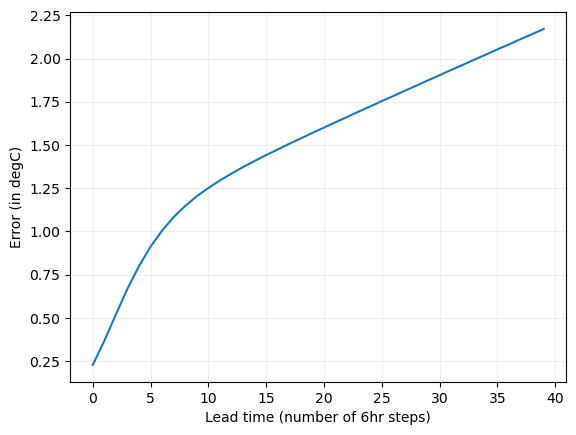

In [17]:
temp_sqerror = (ds_tar.temp.isel(z_l=iz_l) - ds_pred.temp.isel(z_l=iz_l)*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(temp_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in degC)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

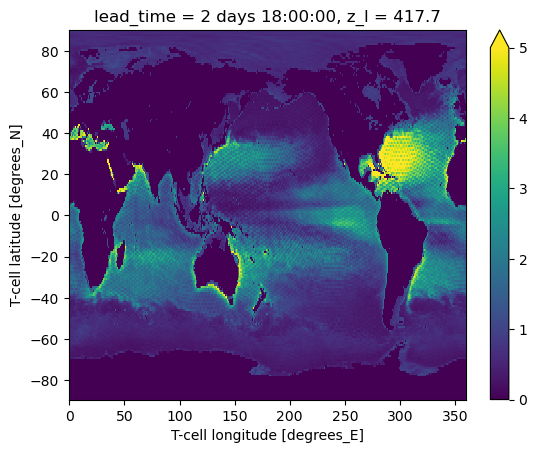

In [18]:
# Spatial RMSE
ileadtime = 10
temp_rmse_latlon = np.sqrt(temp_sqerror.mean(dim=('time')),)
temp_rmse_latlon.isel(lead_time=ileadtime).plot(vmin=0, vmax=5)
plt.show()

In [23]:
# latitude vs depth RMSE for 3D temp
# get the landsea_mask
landsea_mask = xr.where(ds_tar.so.isel(time=0, lead_time=0)==0, 0, 1)

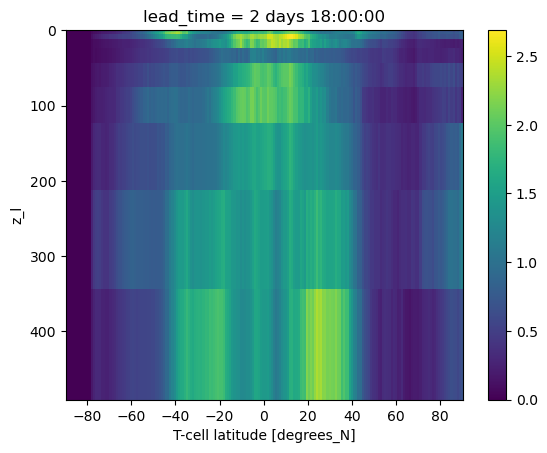

In [24]:
ileadtime = 10
temp_sqerror_depth = (ds_tar.temp - (ds_pred.temp*landsea_mask))**2
temp_rmse_latdepth = np.sqrt(temp_sqerror_depth.mean(dim=("time", "lon")),)
temp_rmse_latdepth.isel(lead_time=ileadtime).plot()
plt.gca().invert_yaxis()
plt.show()

## Salinity

In [23]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 10
iz_l = -1
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
vmin=0; vmax=30

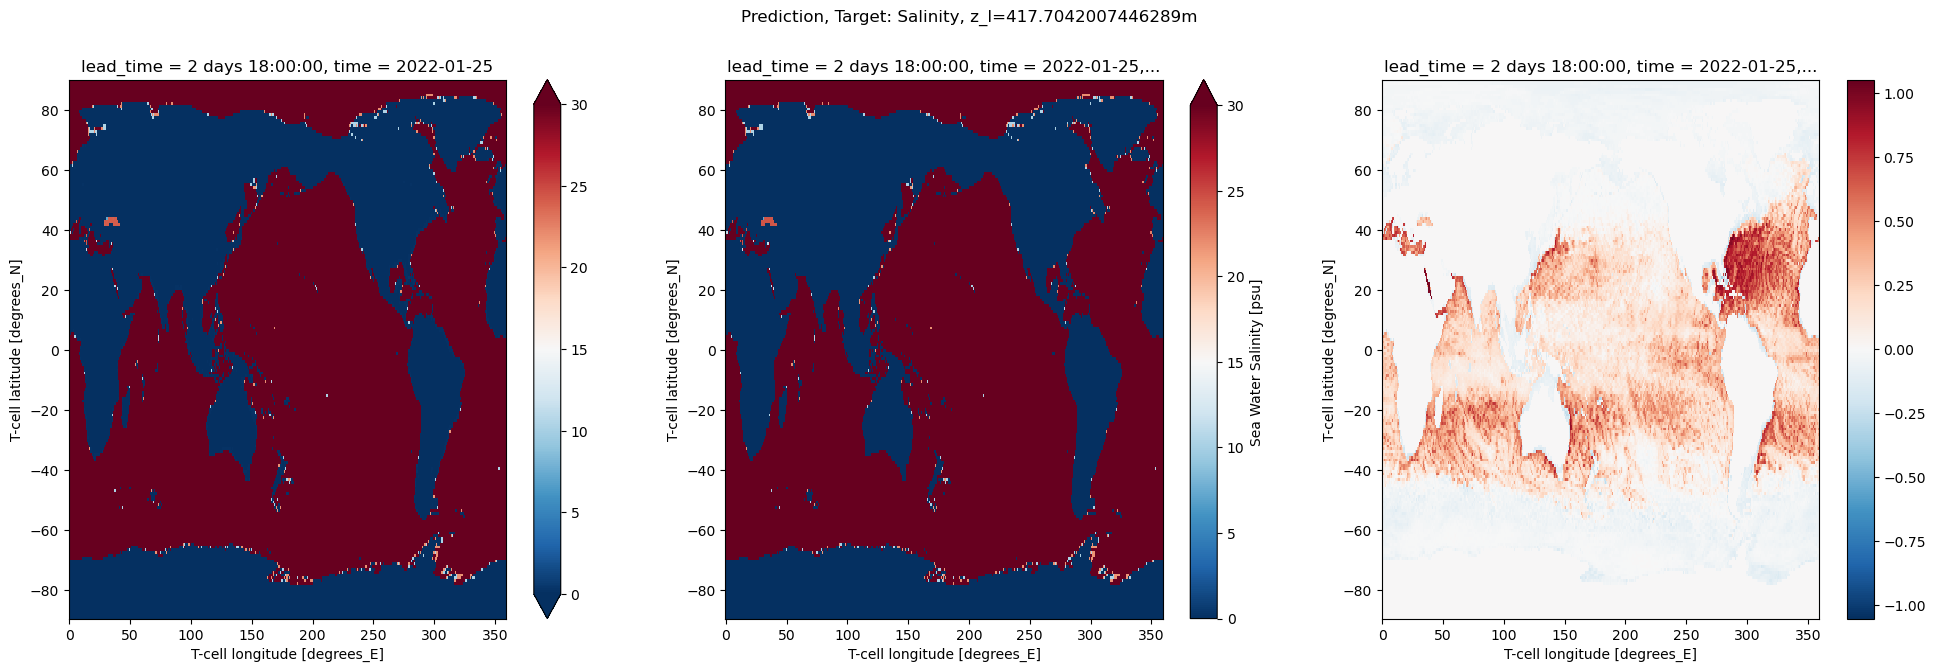

In [27]:
fig, ax = plt.subplots(1,3, figsize=(24,7))
pred = ds_pred.so.isel(time=itime, lead_time=ileadtime, z_l=iz_l)*(1-ocn.landsea_mask.sel(z_l=depth, method="nearest"))
pred.plot(ax=ax[0], cmap="RdBu_r", vmin=vmin, vmax=vmax)
ds_tar.so.isel(time=itime, lead_time=ileadtime, z_l=iz_l).plot(ax=ax[1], cmap="RdBu_r", vmin=vmin, vmax=vmax)
diff = ds_tar.so.isel(time=itime, lead_time=ileadtime, z_l=iz_l) - pred
diff.plot(ax=ax[2], cmap="RdBu_r")
plt.suptitle(f'Prediction, Target: Salinity, z_l={ds_pred.coords["z_l"][iz_l].values}m')
plt.show()

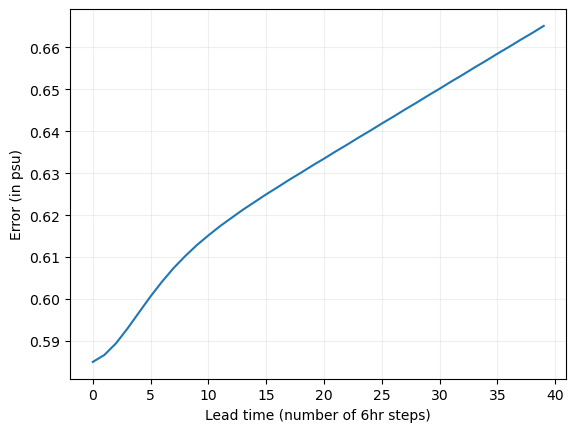

In [25]:
sal_sqerror = (ds_tar.so.isel(z_l=iz_l) - ds_pred.so.isel(z_l=iz_l)*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(sal_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in psu)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

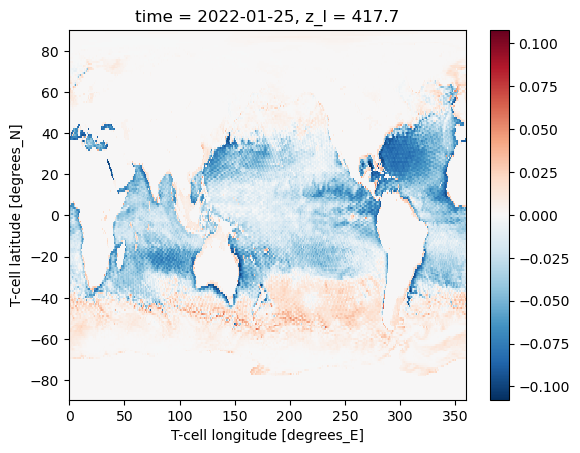

In [33]:
## look at the model predictions: are they even nonzero
timediff_so = (ds_pred.so.isel(time=itime, lead_time=1, z_l=iz_l) - ds_pred.so.isel(time=itime, lead_time=0, z_l=iz_l))*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"}))
timediff_so.plot(cmap="RdBu_r",)
plt.show()

### Ice Concentration 

In [25]:
ileadtime = 10
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)

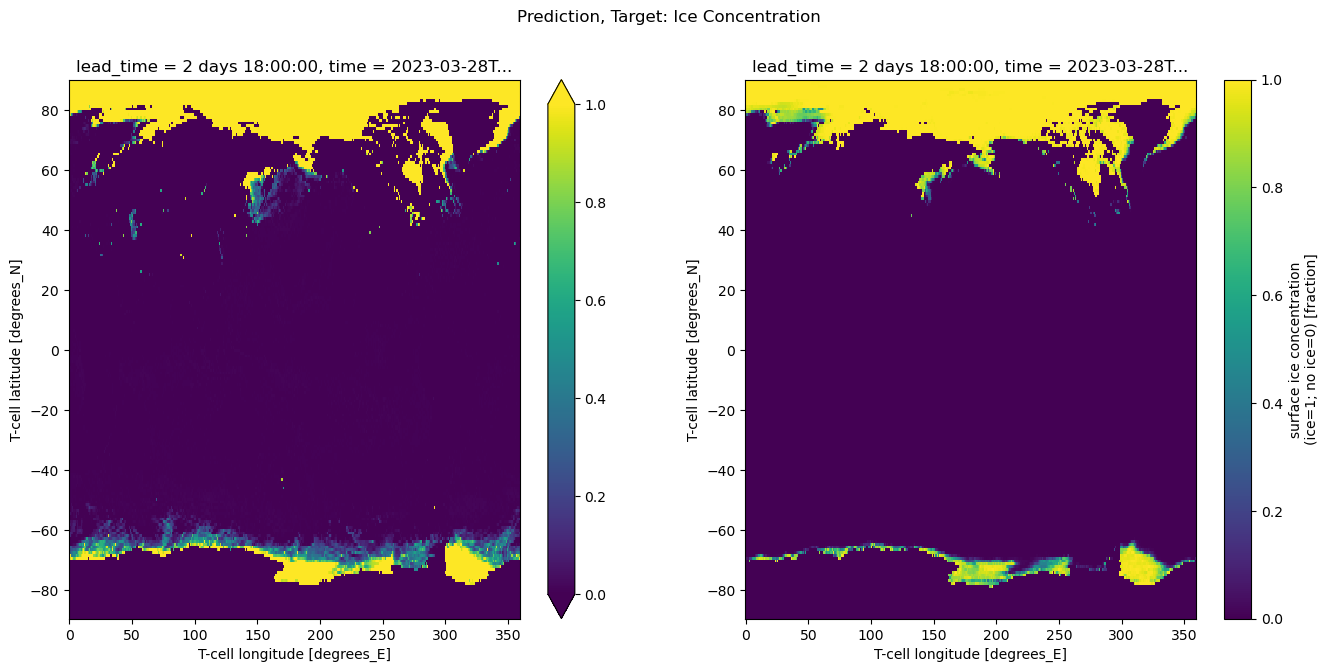

In [26]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
kwargs = {"cmap":"viridis",}
pred = ds_pred.icec.isel(time=itime, lead_time=ileadtime)*(1-atm.land_static.rename({"grid_yt":"lat", "grid_xt":"lon"}))
pred.plot(ax=ax[0], **kwargs, vmin=0, vmax=1)
ds_tar.icec.isel(time=itime, lead_time=ileadtime).plot(ax=ax[1], **kwargs)
plt.suptitle(f'Prediction, Target: Ice Concentration')
plt.show()

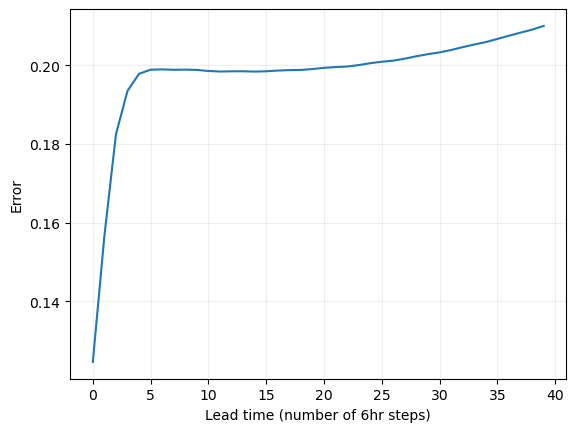

In [27]:
icec_sqerror = (ds_tar.icec - ds_pred.icec*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(icec_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

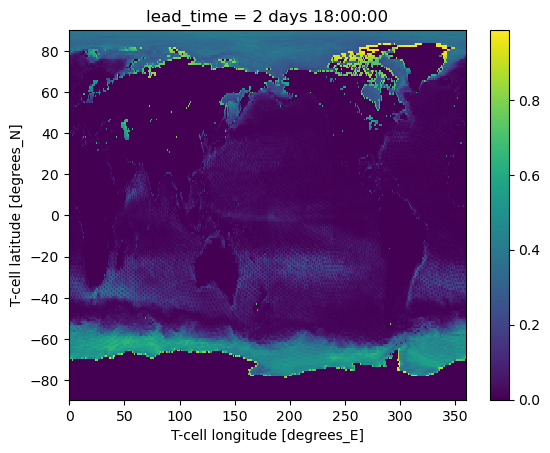

In [28]:
# Spatial RMSE
ileadtime = 10
icec_rmse_latlon = np.sqrt(icec_sqerror.mean(dim=('time')),)
icec_rmse_latlon.isel(lead_time=ileadtime).plot()
plt.show()

### Ice Thickness

In [116]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 7
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
variable = "icetk"

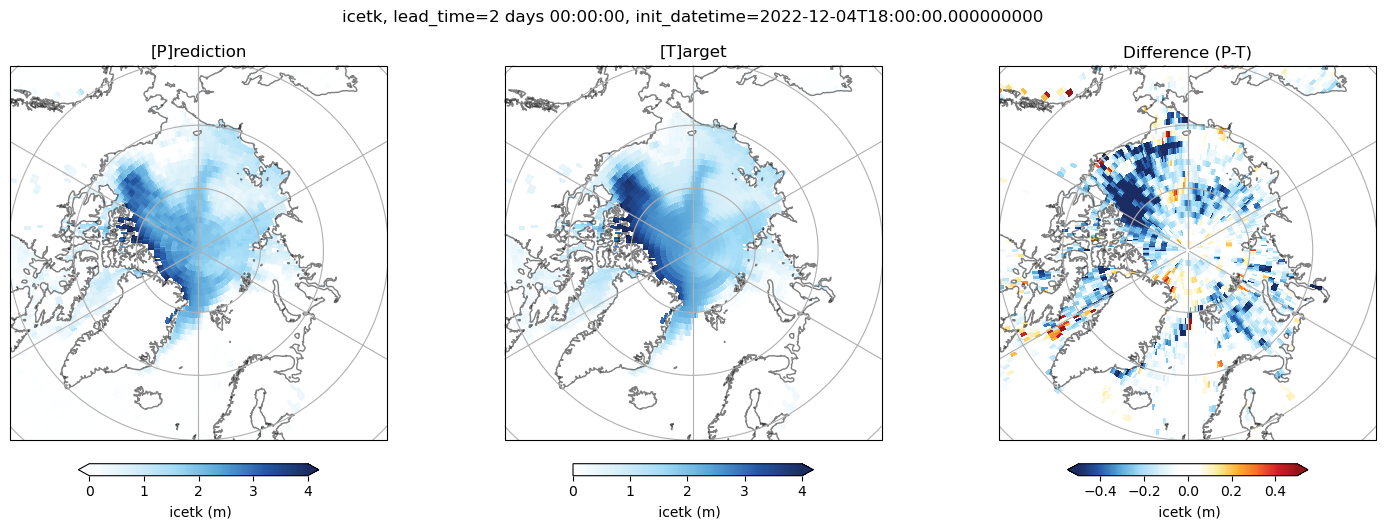

In [117]:
# North Pole
fig, axs = plt.subplots(1, 3, figsize=(15,5.5), subplot_kw=dict(projection=ccrs.NorthPolarStereo()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.5, "label":" icetk (m)", "pad":0.05}, 
          "robust":True, "cmap":cm.WhiteBlue, "vmin":0, "vmax":4,}

ocean_mask = 1-atm.land_static.rename({"grid_yt":"lat", "grid_xt":"lon"})
# prediction
prediction = ds_pred[variable].isel(time=itime, lead_time=ileadtime).where(ocean_mask)
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
axs[0].coastlines(alpha=0.5)
axs[0].gridlines()
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(time=itime, lead_time=ileadtime).where(ocean_mask)
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
axs[1].coastlines(alpha=0.5)
axs[1].gridlines()
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-0.5
kwargs["vmax"]=0.5
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
axs[2].coastlines(alpha=0.5)
axs[2].gridlines()
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"{variable}, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
plt.savefig(os.path.join(_figdir, f"{variable}_{_prototype}_{_expt}_north_pole.png"), dpi=300)
plt.show()

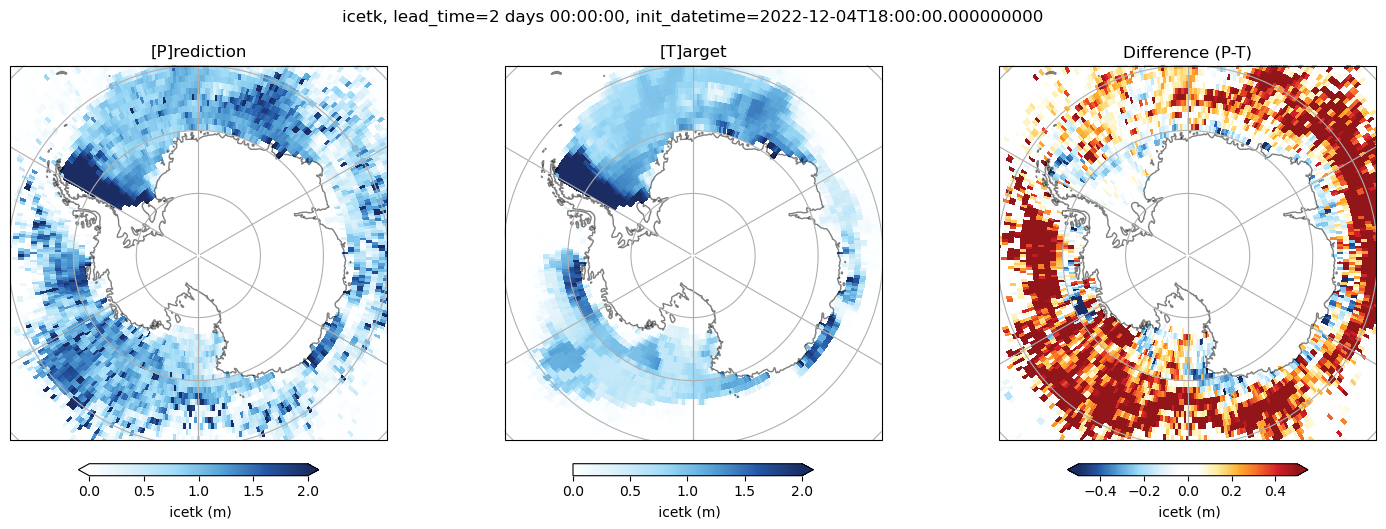

In [118]:
# South Pole
fig, axs = plt.subplots(1, 3, figsize=(15,5.5), subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.5, "label":" icetk (m)", "pad":0.05}, 
          "robust":True, "cmap":cm.WhiteBlue, "vmin":0, "vmax":2,}

# prediction
ocean_mask = 1-atm.land_static.rename({"grid_yt":"lat", "grid_xt":"lon"})
prediction = ds_pred[variable].isel(time=itime, lead_time=ileadtime).where(ocean_mask)
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].set_extent([0, 360, -60, -90], crs=ccrs.PlateCarree())
axs[0].coastlines(alpha=0.5)
axs[0].gridlines()
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(time=itime, lead_time=ileadtime).where(ocean_mask)
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].set_extent([0, 360, -60, -90], crs=ccrs.PlateCarree())
axs[1].coastlines(alpha=0.5)
axs[1].gridlines()
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-0.5
kwargs["vmax"]=0.5
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].set_extent([0, 360, -60, -90], crs=ccrs.PlateCarree())
axs[2].coastlines(alpha=0.5)
axs[2].gridlines()
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"{variable}, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
plt.savefig(os.path.join(_figdir, f"{variable}_{_prototype}_{_expt}_south_pole.png"), dpi=300)
plt.show()

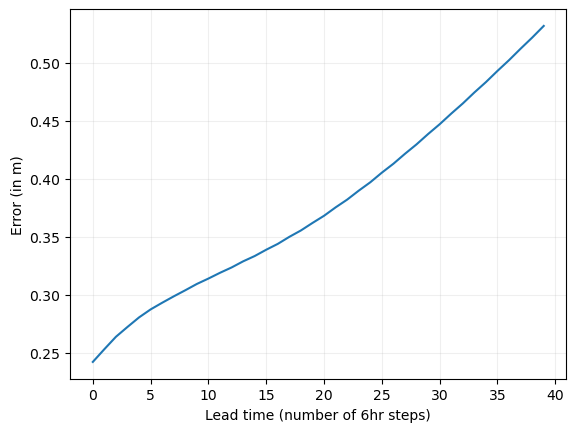

In [31]:
icetk_sqerror = (ds_tar.icetk - ds_pred.icetk*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(icetk_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in m)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

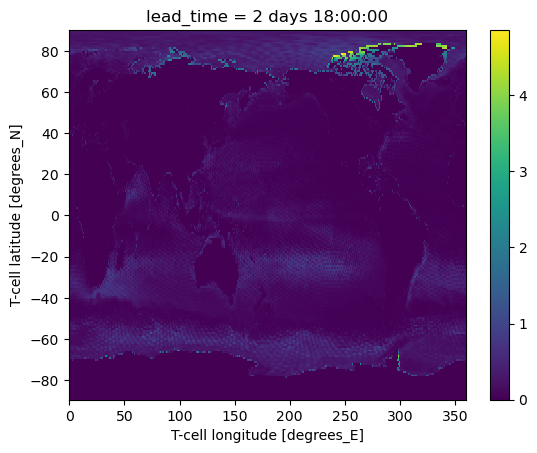

In [32]:
# Spatial RMSE
ileadtime = 10
icetk_rmse_latlon = np.sqrt(icetk_sqerror.mean(dim=('time')),)
icetk_rmse_latlon.isel(lead_time=ileadtime).plot()
plt.show()

### Land : Soil Moisture

In [112]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 7
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
variable = "soilm"

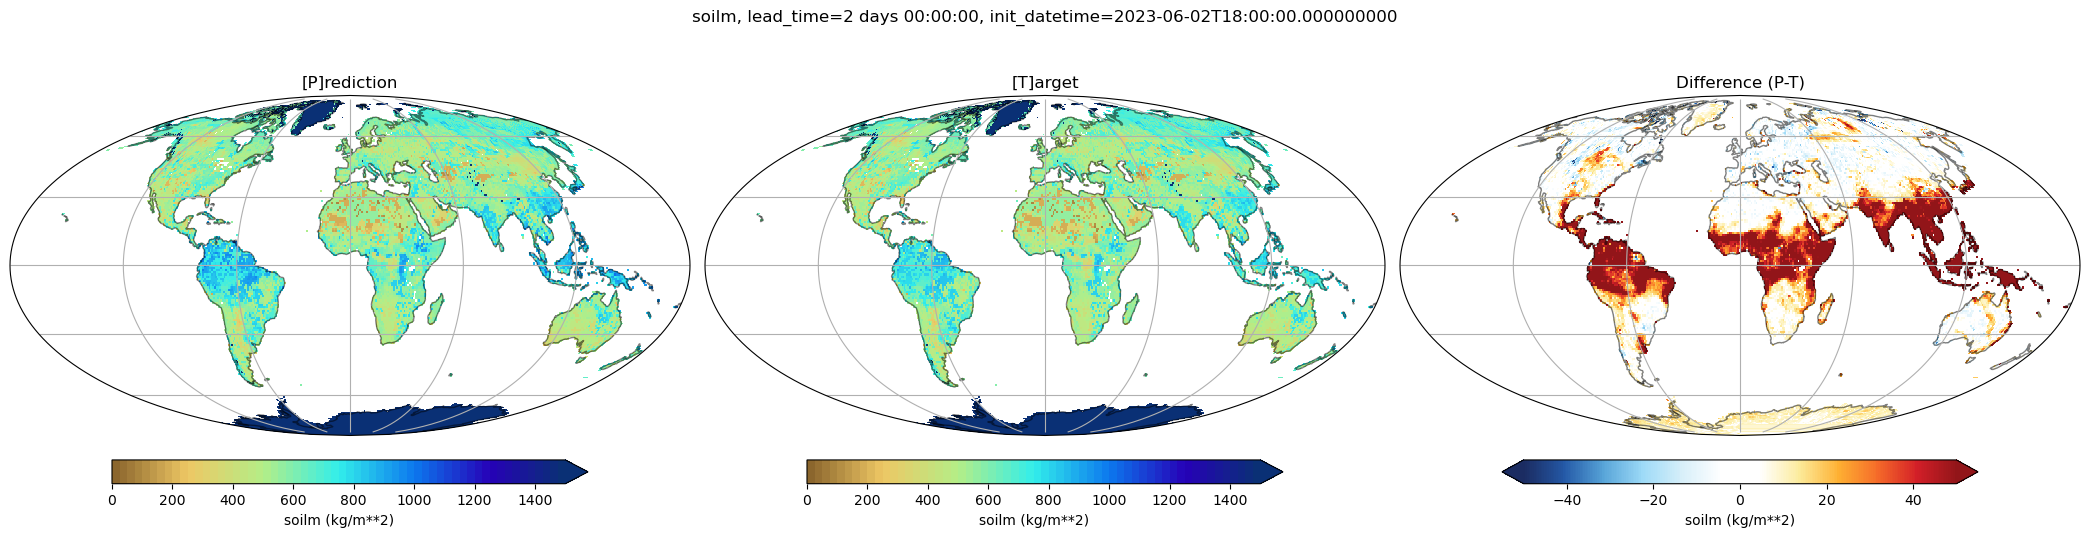

In [113]:
fig, axs = plt.subplots(1, 3, figsize=(21,5.5), subplot_kw=dict(projection=ccrs.Mollweide()))
kwargs = {"cbar_kwargs":{"orientation": "horizontal", "shrink":0.7, "label":"soilm (kg/m**2)", "pad":0.05}, 
          "robust":True, "cmap":cm.GMT_drywet, "vmin":0, "vmax":1500,}

# prediction
land_mask = atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})
prediction = ds_pred[variable].isel(time=itime, lead_time=ileadtime,).where(land_mask)
prediction.plot(ax=axs[0], transform=ccrs.PlateCarree(), **kwargs)
axs[0].coastlines(alpha=0.5)
axs[0].gridlines()
axs[0].set_title("[P]rediction")

# target
target = ds_tar[variable].isel(time=itime, lead_time=ileadtime,).where(land_mask)
target.plot(ax=axs[1], transform=ccrs.PlateCarree(), **kwargs)
axs[1].coastlines(alpha=0.5)
axs[1].gridlines()
axs[1].set_title("[T]arget")

# difference
diff = prediction - target
kwargs["cmap"]=cm.BlueWhiteOrangeRed
kwargs["vmin"]=-50
kwargs["vmax"]=50
diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), **kwargs)
axs[2].coastlines(alpha=0.5)
axs[2].gridlines()
axs[2].set_title("Difference (P-T)")

leadtime = pd.to_timedelta(prediction.lead_time.values, unit="D")
plt.suptitle(f"{variable}, lead_time={leadtime}, init_datetime={prediction.time.values}")
plt.tight_layout()
plt.savefig(os.path.join(_figdir, f"{variable}_{_prototype}_{_expt}.png"), dpi=300)
plt.show()

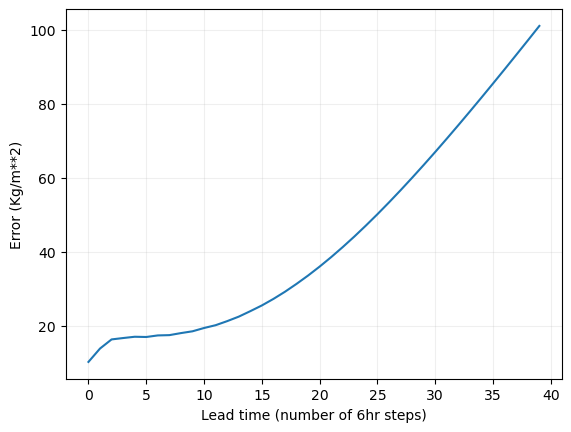

In [42]:
soilm_sqerror = (ds_tar.soilm - ds_pred.soilm*(atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(soilm_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (Kg/m**2)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

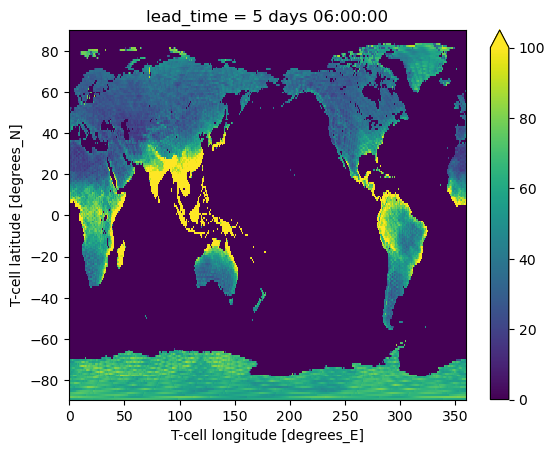

In [46]:
# Spatial RMSE
ileadtime = 20
soilm_rmse_latlon = np.sqrt(soilm_sqerror.mean(dim=('time')),)
soilm_rmse_latlon.isel(lead_time=ileadtime).plot(vmin=0, vmax=100)
plt.show()

### Local plots

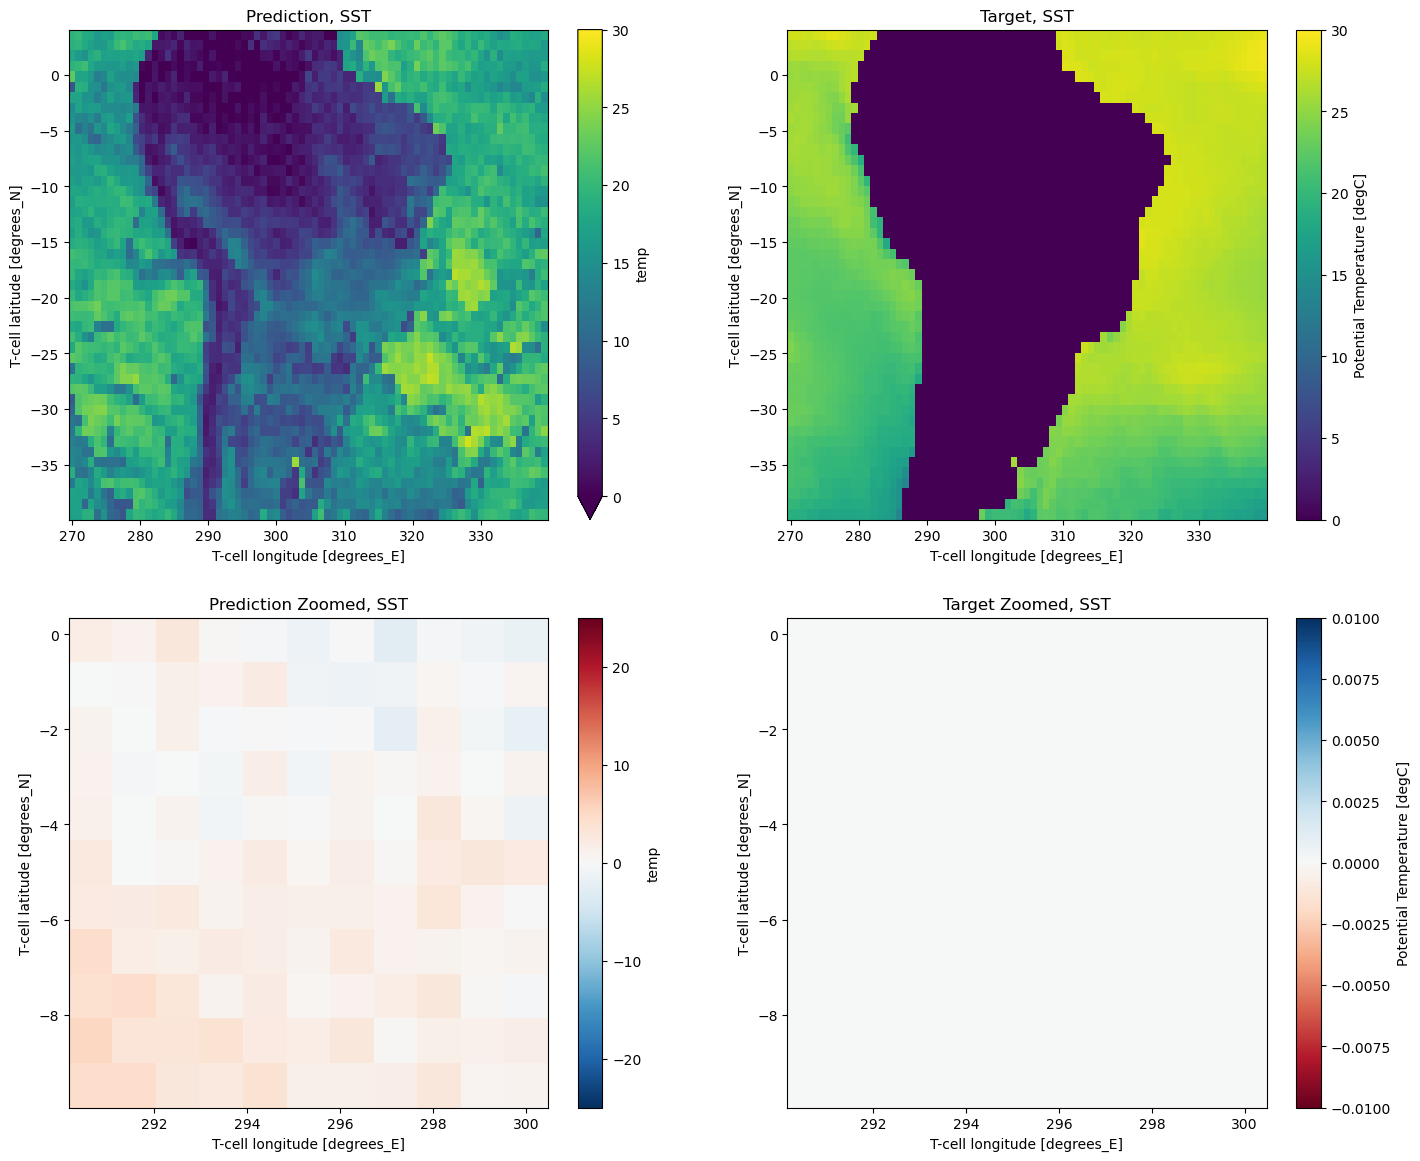

In [13]:
depth = 0 # Surface

fig, ax = plt.subplots(2, 2, figsize=(17,14))

# Prediction
pred_temp = ds_pred.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
pred_temp_zoom = ds_pred.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
pred_temp.plot(ax=ax[0,0], vmin=0, vmax=30); ax[0,0].set_title("Prediction, SST")
pred_temp_zoom.plot(ax=ax[1,0], vmin=-25, vmax=25, cmap='RdBu_r'); ax[1,0].set_title("Prediction Zoomed, SST")

# Target
tar_temp = ds_tar.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
tar_temp_zoom = ds_tar.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
tar_temp.plot(ax=ax[0,1], vmin=0, vmax=30); ax[0,1].set_title("Target, SST")
tar_temp_zoom.plot(ax=ax[1,1], vmin=-0.01, vmax=0.01, cmap='RdBu'); ax[1,1].set_title("Target Zoomed, SST")
#plt.savefig("Input_Prediction_Target_SST_Local.png", dpi=300)
plt.show()